# **Guía 2**

Objetivo: aplicar los conceptos de Pandas en la manipulación y análisis de datos estructurados. Se trabajará con Series y DataFrames, aplicando técnicas de acceso, selección, filtrado y agregación de datos.

### **Caso de Negocio: Análisis de Deserción de Clientes en una Empresa de Telecomunicaciones**

**Contexto**

En la industria de las telecomunicaciones, la retención de clientes es un factor crítico para la sostenibilidad del negocio. La competencia es feroz y adquirir nuevos clientes suele ser más costoso que mantener a los actuales. En este análisis, exploraremos un conjunto de datos que contiene información detallada sobre clientes que han abandonado el servicio (churn) y aquellos que permanecen activos.

Nuestro objetivo es identificar los factores clave que influyen en la deserción, comprender patrones de comportamiento y generar estrategias efectivas para reducir la tasa de abandono.

La empresa ha experimentado un aumento en la tasa de deserción de clientes, lo que ha provocado:
- Pérdida de ingresos recurrentes.
- Incremento en los costos de adquisición de nuevos clientes.
- Menor estabilidad en la base de clientes a largo plazo.

Para abordar esta problemática, es crucial identificar las razones detrás de la deserción y desarrollar estrategias para mejorar la retención de clientes.



**Entrega del Trabajo**

Los estudiantes deben trabajar en grupos de entre 2 y 4 personas. Cada grupo deberá subir su trabajo a un repositorio de GitHub, asegurándose de que el código y los archivos necesarios estén bien organizados y documentados. Posteriormente, deberán enviar el enlace del repositorio en la plataforma Canvas para su evaluación.

Instrucciones para la entrega:

Crear un repositorio en GitHub con un nombre descriptivo para el proyecto.

Subir el código en Jupyter Notebook (.ipynb) o en formato Python (.py).

Incluir un archivo README.md con una breve descripción del trabajo y las instrucciones de ejecución.

Compartir el enlace del repositorio en Canvas dentro del plazo establecido.



**Descripción de las variables del dataset telecom_churn**

El dataset telecom_churn contiene información detallada sobre clientes de una empresa de telecomunicaciones, incluyendo datos generales, planes contratados, uso del servicio telefónico y llamadas al servicio al cliente. Su propósito principal es analizar patrones de deserción de clientes, identificados a través de la variable churn, que indica si un cliente ha abandonado la empresa (1) o sigue siendo cliente (0).

Dentro del dataset, encontramos información general como el estado (state) donde reside el cliente, el código de área (area code), y el número de teléfono (phone number), aunque esta última variable no aporta información útil para el análisis, ya que es un identificador único.

Además, el dataset registra el tiempo que un cliente ha estado en la empresa a través de la variable account length, lo que puede ayudar a analizar si la duración del contrato influye en la deserción. También se incluyen detalles sobre los planes contratados, como si el cliente tiene un plan internacional (international plan), que le permite realizar llamadas internacionales, o un buzón de voz (voice mail plan), que le permite recibir mensajes de voz.

En cuanto al uso del servicio, se registran datos detallados sobre el tiempo en llamadas y los costos asociados. Se divide en tres períodos del día: diurno (total day minutes, total day calls, total day charge), vespertino (total eve minutes, total eve calls, total eve charge) y nocturno (total night minutes, total night calls, total night charge), lo que permite evaluar si hay patrones de consumo que influyen en la deserción. También se incluye información sobre el uso del servicio internacional, con variables como total intl minutes (minutos en llamadas internacionales), total intl calls (cantidad de llamadas internacionales) y total intl charge (costos por llamadas internacionales).

Otro aspecto clave del dataset es el número de llamadas al servicio al cliente (customer service calls), ya que una mayor cantidad de llamadas puede indicar insatisfacción y estar relacionada con la decisión del cliente de abandonar la empresa.

Finalmente, la variable más importante del análisis es churn, que indica si un cliente ha desertado de la empresa. A partir de esta variable, podemos analizar qué factores influyen en la deserción y encontrar patrones en los clientes que tienen mayor probabilidad de abandonar el servicio.


**Exploración y Limpieza de Datos**

Cargar y explorar el dataset

Importa Pandas y carga el dataset telecom_churn.csv en un DataFrame.

Muestra las primeras 5 filas del DataFrame.

Verifica cuántas filas y columnas tiene el dataset.

Muestra información general del dataset, incluyendo los tipos de datos.

Identifica si hay valores nulos en alguna columna.

In [ ]:
import pandas as pd

# URL del archivo en formato CSV
url = "https://docs.google.com/spreadsheets/d/1EEC31J6XyzrkCQAuyEVFag7S4LmMGn7minx70WHopsI/export?format=csv"

# Cargar el dataset en Pandas
df = pd.read_csv(url)

# Mostrar las primeras filas
print(df.head())

# Verificar cuántas filas y columnas tiene el dataset
print("\nDimensiones del dataset (filas, columnas):", df.shape)

# Mostrar información general del dataset, incluyendo tipos de datos
print("\nInformación del dataset:")
print(df.info())

# Identificar si hay valores nulos en alguna columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

**Análisis de Churn y Factores Relacionados**

Calcula el porcentaje de clientes que han desertado (churn = 1).

Identifica si los clientes con plan internacional (international plan) tienen mayor tasa de deserción.

Identifica si los clientes con buzón de voz (voice mail plan) tienen menor tasa de deserción.

In [ ]:
# Calcular el porcentaje de clientes que han desertado
churn_rate = df['churn'].mean() * 100
print(f"Porcentaje total de clientes que han desertado: {churn_rate:.2f}%\n")

# Calcular la tasa de deserción según el plan internacional
churn_by_plan = df.groupby('international plan')['churn'].mean() * 100

# Mostrar resultados del plan internacional
print("Tasa de deserción según el PLAN INTERNACIONAL:")
print(f"Clientes SIN plan internacional: {churn_by_plan['no']:.2f}% de deserción")
print(f"Clientes CON plan internacional: {churn_by_plan['yes']:.2f}% de deserción\n")

# Calcular la tasa de deserción según el buzón de voz
churn_by_voicemail = df.groupby('voice mail plan')['churn'].mean() * 100

# Mostrar resultados del buzón de voz
print("Tasa de deserción según el BUZÓN DE VOZ:")
print(f"Clientes SIN buzón de voz: {churn_by_voicemail['no']:.2f}% de deserción")
print(f"Clientes CON buzón de voz: {churn_by_voicemail['yes']:.2f}% de deserción\n")

# Conclusiones basadas en los resultados
print("CONCLUSIONES:")
if churn_by_plan['yes'] > churn_by_plan['no']:
    print("Los clientes con PLAN INTERNACIONAL tienen una tasa de deserción MÁS ALTA.")
else:
    print("Los clientes con PLAN INTERNACIONAL tienen una tasa de deserción MÁS BAJA.")

if churn_by_voicemail['yes'] < churn_by_voicemail['no']:
    print("Los clientes con BUZÓN DE VOZ tienen una tasa de deserción MÁS BAJA.")
else:
    print("Los clientes con BUZÓN DE VOZ tienen una tasa de deserción MÁS ALTA.")







Porcentaje total de clientes que han desertado: 14.49%

Tasa de deserción según el PLAN INTERNACIONAL:
Clientes SIN plan internacional: 11.50% de deserción
Clientes CON plan internacional: 42.41% de deserción

Tasa de deserción según el BUZÓN DE VOZ:
Clientes SIN buzón de voz: 16.72% de deserción
Clientes CON buzón de voz: 8.68% de deserción

CONCLUSIONES:
Los clientes con PLAN INTERNACIONAL tienen una tasa de deserción MÁS ALTA.
Los clientes con BUZÓN DE VOZ tienen una tasa de deserción MÁS BAJA.


**Análisis de la Duración del Servicio y Deserción**

¿Cuál es la duración promedio de la cuenta (account length) entre clientes que desertaron y los que permanecen?

¿Los clientes con cuentas más antiguas tienen más probabilidades de desertar?

Duración promedio de la cuenta según el estado de deserción:
Clientes que NO han desertado: 100.79 días en promedio
Clientes que SÍ han desertado: 102.66 días en promedio



<ipython-input-8-5a8033e29cf7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes que NO han desertado: {account_length_mean[0]:.2f} días en promedio")
<ipython-input-8-5a8033e29cf7>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes que SÍ han desertado: {account_length_mean[1]:.2f} días en promedio\n")


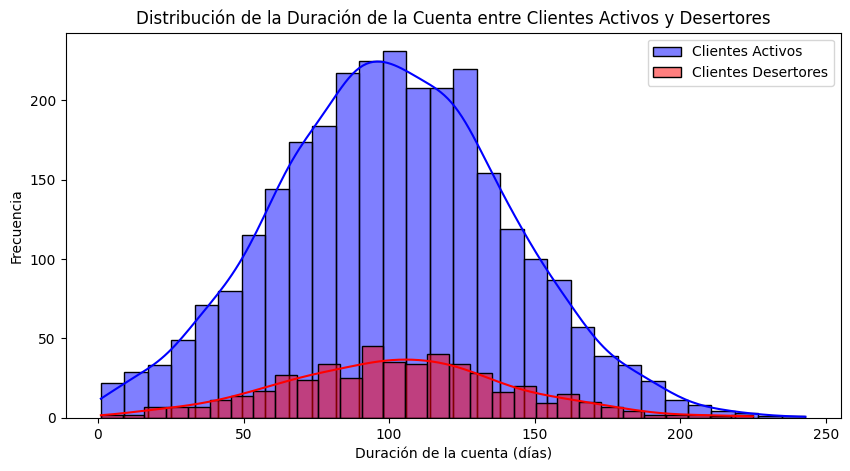

In [ ]:
# Calcular la duración promedio de la cuenta para clientes que desertaron y los que permanecen
account_length_mean = df.groupby('churn')['account length'].mean()

# Mostrar resultados
print("Duración promedio de la cuenta según el estado de deserción:")
print(f"Clientes que NO han desertado: {account_length_mean[0]:.2f} días en promedio")
print(f"Clientes que SÍ han desertado: {account_length_mean[1]:.2f} días en promedio\n")

# Comparación visual con un histograma
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df[df['churn'] == 0]['account length'], label='Clientes Activos', color='blue', kde=True, bins=30)
sns.histplot(df[df['churn'] == 1]['account length'], label='Clientes Desertores', color='red', kde=True, bins=30)
plt.xlabel("Duración de la cuenta (días)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Duración de la Cuenta entre Clientes Activos y Desertores")
plt.legend()
plt.show()


**Relación entre Deserción y Uso del Servicio**

Compara la cantidad de minutos usados en llamadas diurnas (total day minutes) entre clientes con y sin churn.

Compara la cantidad de minutos usados en llamadas nocturnas (total night minutes).

Compara el número total de llamadas (total day calls) entre clientes con y sin churn.

In [ ]:
# Comparación de minutos en llamadas diurnas
day_minutes_mean = df.groupby('churn')['total day minutes'].mean()
print("Promedio de minutos en llamadas diurnas:\n", day_minutes_mean)

# Comparación de minutos en llamadas nocturnas
night_minutes_mean = df.groupby('churn')['total night minutes'].mean()
print("\nPromedio de minutos en llamadas nocturnas:\n", night_minutes_mean)

# Comparación del número total de llamadas diurnas
day_calls_mean = df.groupby('churn')['total day calls'].mean()
print("\nPromedio de llamadas diurnas:\n", day_calls_mean)


Promedio de minutos en llamadas diurnas:
 churn
False    175.175754
True     206.914079
Name: total day minutes, dtype: float64

Promedio de minutos en llamadas nocturnas:
 churn
False    200.133193
True     205.231677
Name: total night minutes, dtype: float64

Promedio de llamadas diurnas:
 churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64


**Impacto de las Llamadas al Servicio al Cliente en la Deserción**

Calcula el número promedio de llamadas al servicio al cliente (customer service calls) entre clientes que desertaron y los que no.

Divide los clientes en dos grupos:

- Grupo 1: Clientes que llamaron más de 3 veces al servicio al cliente.
- Grupo 2: Clientes que llamaron 3 veces o menos.
Compara la tasa de churn entre ambos grupos.

In [ ]:
# Calcular el número promedio de llamadas al servicio al cliente por grupo
promedio_llamadas_servicio = df.groupby('churn')['customer service calls'].mean()
print("Promedio de llamadas al servicio al cliente según deserción:\n", promedio_llamadas_servicio)

# Crear los grupos según la cantidad de llamadas al servicio al cliente
df['grupo_llamadas_altas'] = df['customer service calls'] > 3

# Comparar la tasa de deserción entre ambos grupos
tasa_desercion_llamadas = df.groupby('grupo_llamadas_altas')['churn'].mean() * 100
print("\nTasa de deserción según número de llamadas al servicio al cliente:\n", tasa_desercion_llamadas)



Promedio de llamadas al servicio al cliente según deserción:
 churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64

Tasa de deserción según número de llamadas al servicio al cliente:
 grupo_llamadas_altas
False    11.252446
True     51.685393
Name: churn, dtype: float64


**Análisis del Costo de las Llamadas y Churn**

Compara el costo total de llamadas diurnas (total day charge) entre clientes con y sin churn.

Compara el costo total de llamadas nocturnas (total night charge).

¿Los clientes con mayor gasto en llamadas internacionales (total intl charge) tienen más probabilidades de desertar?

In [ ]:
# Comparar el costo total de llamadas diurnas entre clientes con y sin deserción
costo_llamadas_diurnas = df.groupby('churn')['total day charge'].mean()
print("Costo promedio de llamadas diurnas según deserción:\n", costo_llamadas_diurnas)

# Comparar el costo total de llamadas nocturnas entre clientes con y sin deserción
costo_llamadas_nocturnas = df.groupby('churn')['total night charge'].mean()
print("\nCosto promedio de llamadas nocturnas según deserción:\n", costo_llamadas_nocturnas)

# Comparar el gasto en llamadas internacionales entre clientes con y sin deserción
costo_llamadas_internacionales = df.groupby('churn')['total intl charge'].mean()
print("\nCosto promedio de llamadas internacionales según deserción:\n", costo_llamadas_internacionales)


Costo promedio de llamadas diurnas según deserción:
 churn
False    29.780421
True     35.175921
Name: total day charge, dtype: float64

Costo promedio de llamadas nocturnas según deserción:
 churn
False    9.006074
True     9.235528
Name: total night charge, dtype: float64

Costo promedio de llamadas internacionales según deserción:
 churn
False    2.743404
True     2.889545
Name: total intl charge, dtype: float64
